In [18]:
import pandas  as pd

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

import joblib

In [19]:
# Read data without labels
data_without_labels = pd.read_csv('src/conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

Prediction set (without labels) : (31620, 5)


In [20]:
# the new_user columns is not a numerical features, i change the information  '1' by  a 'Y' and '0' by 'N'
X_without_labels['new_user'] =  X_without_labels['new_user'].astype(str)
X_without_labels['new_user'] = [ 'Y' if x == '1' else 'N' for x in X_without_labels['new_user'] ]

In [21]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X_without_labels.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['age', 'total_pages_visited']
Found categorical features  ['country', 'new_user', 'source']


C:\Users\dunca\AppData\Local\Temp\ipykernel_9972\3728999899.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,t in X_without_labels.dtypes.iteritems():


In [22]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [23]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [25]:
print("Encoding categorical features and standardizing numerical features...")
X_without_labels = preprocessor.fit_transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.31512217  3.33913917  0.          1.          0.          0.
   0.          1.        ]
 [-1.03657046  0.03888347  0.          1.          0.          1.
   1.          0.        ]
 [ 0.16584336 -1.16120951  0.          0.          0.          1.
   0.          1.        ]
 [ 0.16584336  0.33890671  0.          0.          1.          1.
   0.          0.        ]
 [-0.67584631 -0.56116302  0.          0.          0.          0.
   0.          1.        ]]


In [26]:


model = joblib.load('src/model.joblib')
Y_pred = model.predict(X_without_labels)


data_without_labels['converted'] = Y_pred
#now i have the predict with the best model trained before.


In [27]:
# see information with predict model for converted =1
converted = data_without_labels[data_without_labels['converted'] == 1]
converted.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,28,0,Seo,16,1
22,US,19,0,Direct,14,1
41,US,17,0,Seo,17,1
43,US,43,1,Ads,16,1
190,US,31,1,Direct,15,1


<AxesSubplot: title={'center': 'Répartition par pays de la prédiction des abonnés'}, xlabel='country'>

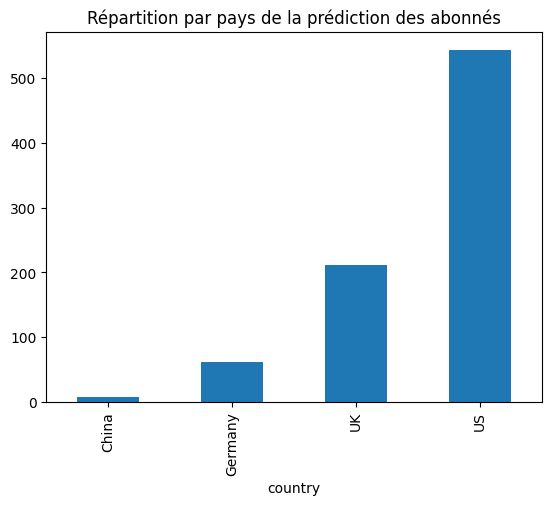

In [28]:
converted.groupby(["country"])['converted'].sum().plot(kind='bar', title= "Répartition par pays de la prédiction des abonnés")

<AxesSubplot: title={'center': 'Répartition par age de la prédiction des abonnés'}, xlabel='age'>

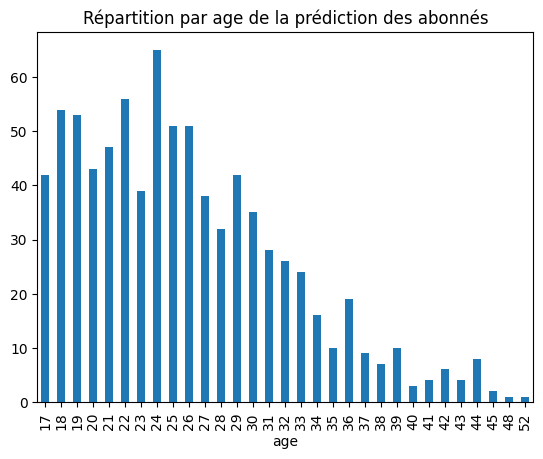

In [29]:
converted.groupby(["age"]).size().plot(kind='bar', title= "Répartition par age de la prédiction des abonnés")

<AxesSubplot: title={'center': 'Répartition par nouvel utilisateur de la prédiction des abonnés'}, xlabel='new_user'>

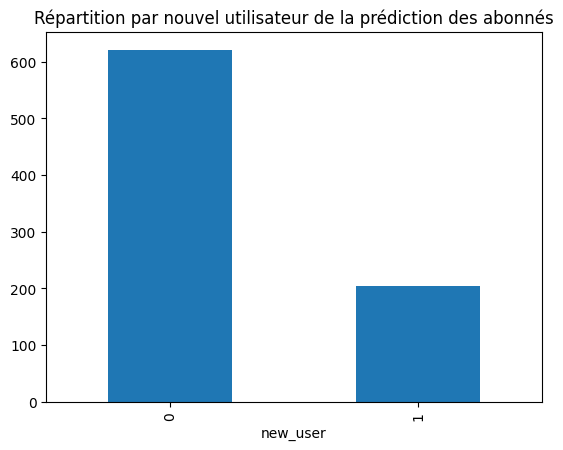

In [30]:
converted.groupby(["new_user"]).size().plot(kind='bar', title= "Répartition par nouvel utilisateur de la prédiction des abonnés")

<AxesSubplot: title={'center': 'Répartition par source de la prédiction des abonnés'}, xlabel='source'>

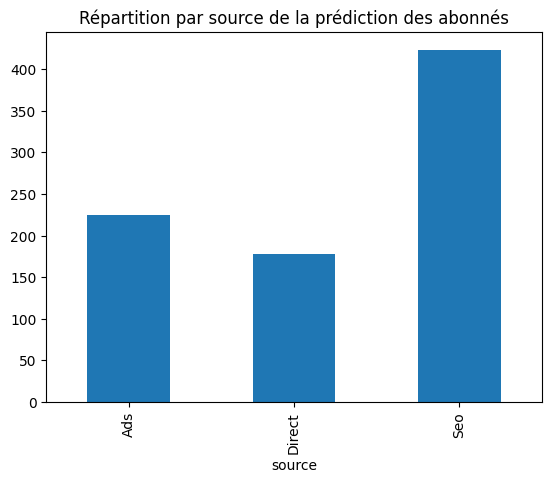

In [31]:
converted.groupby(["source"]).size().plot(kind='bar', title= "Répartition par source de la prédiction des abonnés")

<AxesSubplot: title={'center': 'Répartition par nombre de pages visitées de la prédiction des abonnés'}, xlabel='total_pages_visited'>

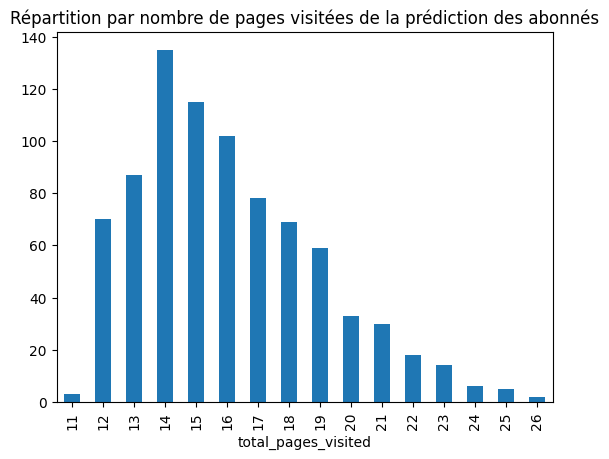

In [32]:
converted.groupby(["total_pages_visited"]).size().plot(kind='bar', title= "Répartition par nombre de pages visitées de la prédiction des abonnés")

Conclusion:

The population most interested in being a 'converted' is of US or UK origin, is between 18 and 30 years old, should not necessarily be a new user, without a specific source (Seo is a plus) and have visited at least 11 pages on the site.
